# What Makes A Best Original Screenplay?

    By Allison Ragan and Allison Shafer
    American University
    STAT-696 Applied Natural Language Processing

# Analysis

# Table of Contents

    I. Package Imports
    II. NLP Transformations
        i. CountVectorized
        ii. TFIDF
    III. Sentiment Analysis
        i. Sentiment Analysis -- Dialogue
        ii. Sentiment Analysis -- Full Script
    IV. Topic Modeling
        i. Topic Modeling -- Dialogue
        ii. Topic Modeling -- Full Script
    V. K-Means Clustering
        i. K-Means Clustering -- Dialogue
        ii. K-Means Clustering -- Full Script
    VI. Results

## Package Imports

In [1]:
import pandas as pd 
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import NMF as nmf
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import wordcloud # may need to install
from plotnine import * # may need to install; ggplot included
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from afinn import Afinn
from nltk import word_tokenize as w_tokenize

In [2]:
# Read in .csv to dataframe

movies_df = pd.read_csv('./movies_df.csv')

## Data Visualizations

## Prep Data for Analysis


In [3]:
# Created grouped data

Genres_df = movies_df.groupby(["GenresBroad"])

Win_Lose = movies_df.groupby('orig_screen_win')

# sanity check on grouping
Genres_df.agg({'dialogue_length':sum})

Win_Lose.agg({'dialogue_length':sum})


# Group text by Genre for analysis
text_group_genre = Genres_df['cleaned_dialogue'].apply(' '.join).reset_index()

text_group_genre = pd.DataFrame(text_group_genre)

# Group text by winner/loser for analysis

win_lose_text = Win_Lose['cleaned_dialogue'].apply(' '.join).reset_index()

## NLP transformations

### CV

In [4]:
# instantiate

# all scripts and visuals 
bow_all = CountVectorizer(ngram_range=(1,2), max_df = .85, min_df = 2)
# fit + transform training data
bow_all_fit = bow_all.fit_transform(movies_df['cleaned_script'])

# for dialogue only
bow_dialogue = CountVectorizer(ngram_range=(1,2), max_df = .85, min_df = .2)
# fit + transform training data
bow_dialogue_fit = bow_dialogue.fit_transform(movies_df['cleaned_dialogue'])

### TFIDF

In [5]:
# instantiate - All parts of script
tfidf_all = TfidfVectorizer(ngram_range = (1,2), max_df = .8, min_df = .2, stop_words = 'english')

# fit + transform training data - all scripts and visuals

tfidf_all_fit = tfidf_all.fit_transform(movies_df['cleaned_script'])
tfidf_vocab_all = tfidf_all.vocabulary_
tfidf_vocab_all = {k: v for k, v in sorted(tfidf_vocab_all.items(), key=lambda item: item[1], reverse=True)}
print(tfidf_vocab_all)
len(tfidf_vocab_all)


# instantiate - Dialogue Only
tfidf_dialogue = TfidfVectorizer(ngram_range = (1,2), max_df = .85, min_df = .2, stop_words = 'english')

# fit + transform training data - dialogue only 
tfidf_dialogue_fit = tfidf_dialogue.fit_transform(movies_df['cleaned_dialogue'])
tfidf_vocab_dialogue = tfidf_dialogue.vocabulary_
tfidf_vocab_dialogue = {k: v for k, v in sorted(tfidf_vocab_dialogue.items(), key=lambda item: item[1], reverse=True)}
print(tfidf_vocab_dialogue)
len(tfidf_vocab_dialogue)

{'zone': 3640, 'zero': 3639, 'yup': 3638, 'youve': 3637, 'youre right': 3636, 'youre going': 3635, 'youre': 3634, 'younger': 3633, 'young woman': 3632, 'young man': 3631, 'youll': 3630, 'youd': 3629, 'york city': 3628, 'york': 3627, 'yesterday': 3626, 'yes yes': 3625, 'yes think': 3624, 'yes thank': 3623, 'yes sir': 3622, 'yes know': 3621, 'yes int': 3620, 'yes course': 3619, 'yep': 3618, 'yellow': 3617, 'yelling': 3616, 'yell': 3615, 'yearold': 3614, 'year old': 3613, 'year later': 3612, 'year ago': 3611, 'yeah yeah': 3610, 'yeah thats': 3609, 'yeah sure': 3608, 'yeah sorry': 3607, 'yeah right': 3606, 'yeah okay': 3605, 'yeah mean': 3604, 'yeah like': 3603, 'yeah know': 3602, 'yeah int': 3601, 'yeah guess': 3600, 'yeah got': 3599, 'yeah good': 3598, 'yeah gon': 3597, 'yay': 3596, 'yawn': 3595, 'yard away': 3594, 'yard': 3593, 'yank': 3592, 'wrote': 3591, 'written': 3590, 'writing': 3589, 'writes': 3588, 'writer': 3587, 'write': 3586, 'wrist': 3585, 'wrestling': 3584, 'wrapping': 3583,

{'zero': 2817, 'yup': 2816, 'youve': 2815, 'youre going': 2814, 'youre': 2813, 'younger': 2812, 'young woman': 2811, 'young man': 2810, 'youll': 2809, 'youd': 2808, 'york city': 2807, 'york': 2806, 'yesterday': 2805, 'yes yes': 2804, 'yes think': 2803, 'yes thank': 2802, 'yes sorry': 2801, 'yes sir': 2800, 'yes know': 2799, 'yes good': 2798, 'yes course': 2797, 'yep': 2796, 'yellow': 2795, 'yelling': 2794, 'yell': 2793, 'yearold': 2792, 'year old': 2791, 'year ago': 2790, 'yeah yeah': 2789, 'yeah sorry': 2788, 'yeah right': 2787, 'yeah need': 2786, 'yeah mean': 2785, 'yeah like': 2784, 'yeah know': 2783, 'yeah guess': 2782, 'yeah got': 2781, 'yeah good': 2780, 'yeah gon': 2779, 'yeah fuck': 2778, 'yard': 2777, 'yank': 2776, 'wrote': 2775, 'wrong': 2774, 'written': 2773, 'writing': 2772, 'writes': 2771, 'writer': 2770, 'write': 2769, 'wrist': 2768, 'wrestling': 2767, 'wrapping': 2766, 'wrapped': 2765, 'wrap': 2764, 'wow': 2763, 'wounded': 2762, 'wound': 2761, 'wouldnt': 2760, 'worth': 2

2818

# Sentiment Analysis

Using AFINN lexicon, aka the "new ANEW" which calculates a polarity score associated with each word.


### Sentiment Analysis -- Dialogue

In [6]:
# initialize afinn sentiment analyzer
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in list(movies_df['cleaned_dialogue'])]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

afinn_dialogue = pd.DataFrame([list(movies_df['Title']), list(movies_df['Genres']), list(movies_df['GenresBroad']), list(movies_df['orig_screen_win']), sentiment_scores, sentiment_category]).T
afinn_dialogue.columns = ['Titles', 'Genres', 'GenresBroad', 'Winner', 'SentimentScore', 'SentimentCategory']
afinn_dialogue['SentimentScore'] = afinn_dialogue['SentimentScore'].astype('float')

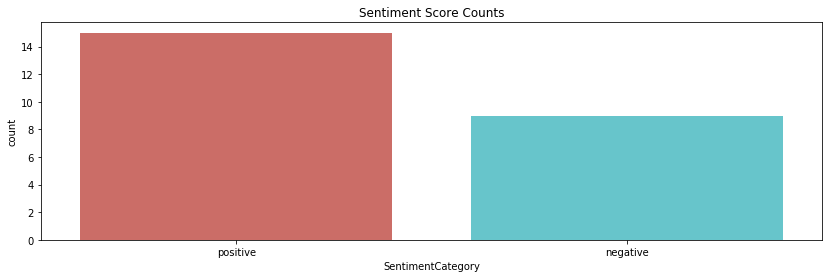

In [8]:
plt.figure(figsize=(14,4))
sns.countplot(x='SentimentCategory', data=afinn_dialogue, palette="hls").set_title("Sentiment Score Counts")
plt.show()

#### Winners vs Losers

In [9]:
# sentiment statistics for winners/losers
afinn_dialogue.groupby(by=['Winner']).describe()

SentimentScore                                                       \
                count        mean         std     min    25%    50%    75%   
Winner                                                                       
0                19.0   43.157895  496.743536 -1120.0 -199.0  141.0  359.5   
1                 5.0  105.400000  139.890314   -32.0    9.0   75.0  153.0   

               
          max  
Winner         
0       932.0  
1       322.0

Text(0.5, 1.0, 'Boxplot of Sentiment Score by Result')

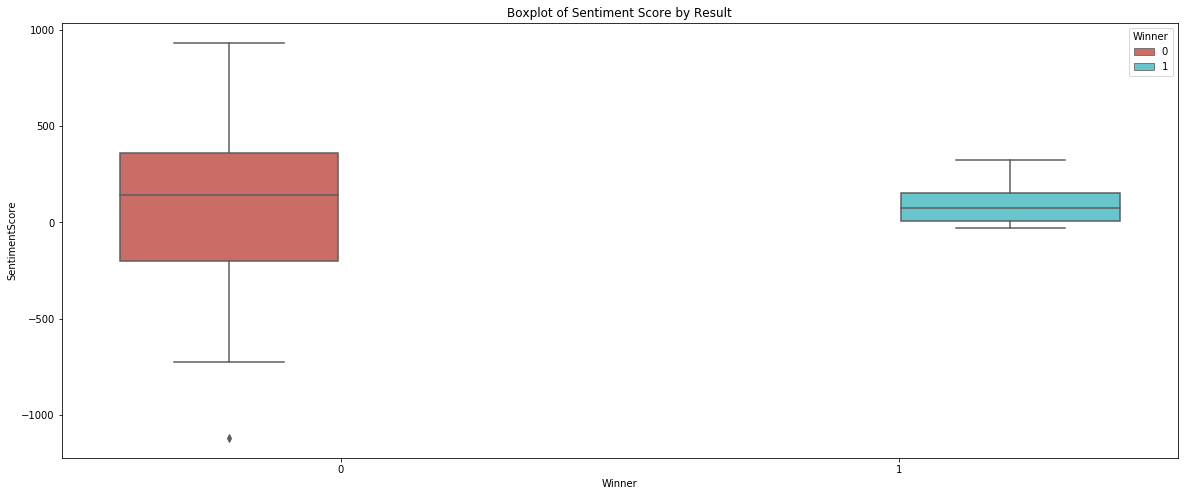

In [10]:
# boxplot
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Winner', y="SentimentScore", 
                 hue='Winner', data=afinn_dialogue, ax=ax,
                 palette="hls").set_title('Boxplot of Sentiment Score by Result')

Text(0.5, 1.0, 'Bar Plot of Sentiment Score by Result')

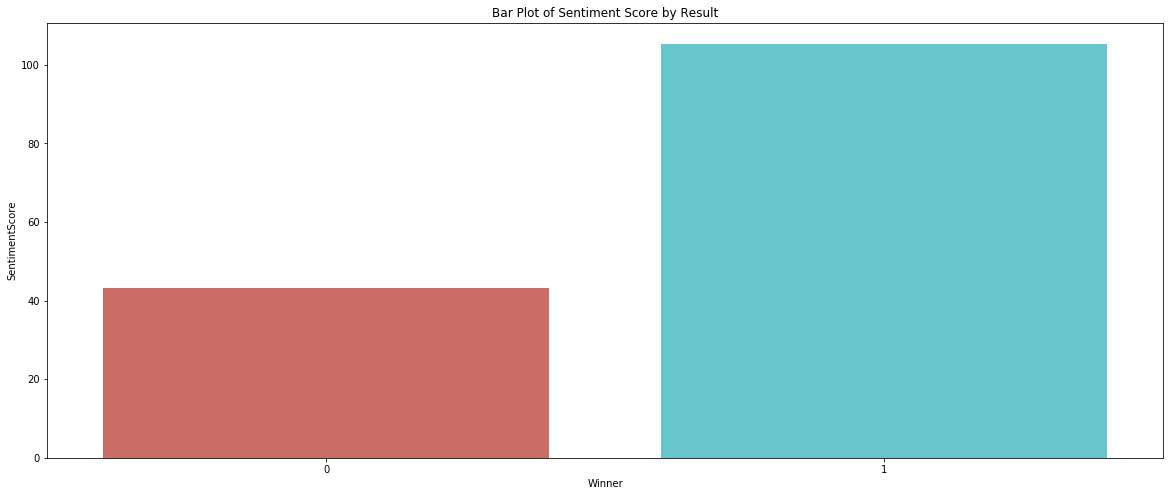

In [11]:
# barplot
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Winner", y = "SentimentScore", ax=ax, data=afinn_dialogue, 
            palette="hls", ci=None).set_title('Bar Plot of Sentiment Score by Result')

Text(0.5, 1.0, 'Count Plot of Sentiment Score by Result')

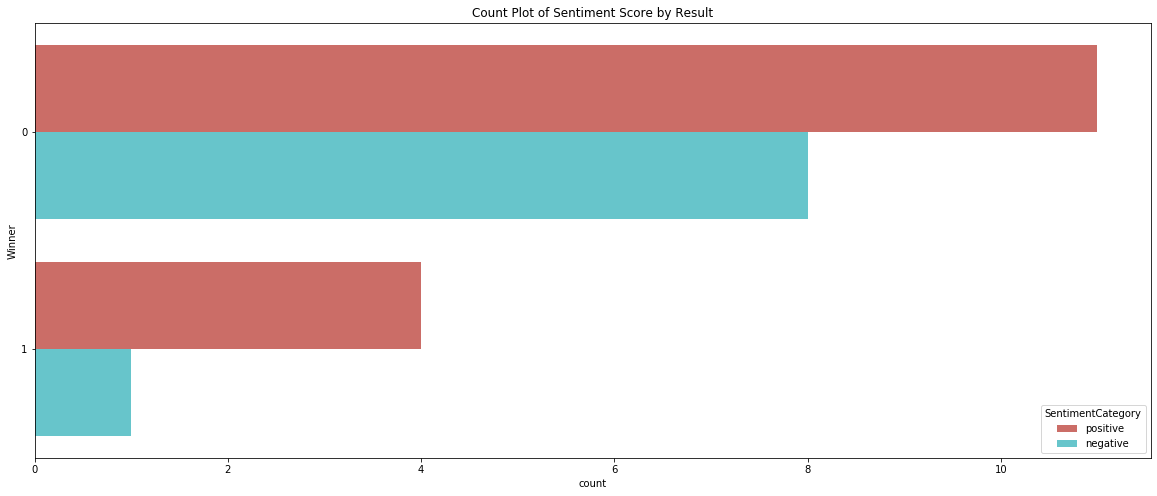

In [12]:
# countplot
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y="Winner", hue="SentimentCategory", data=afinn_dialogue, 
              ax=ax, palette="hls").set_title('Count Plot of Sentiment Score by Result')

### Sentiment Analysis -- Full Script

In [13]:
# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in list(movies_df['cleaned_script'])]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

afinn_all = pd.DataFrame([list(movies_df['Title']), list(movies_df['Genres']), list(movies_df['GenresBroad']), list(movies_df['orig_screen_win']), sentiment_scores, sentiment_category]).T
afinn_all.columns = ['Titles', 'Genres', 'GenresBroad', 'Winner', 'SentimentScore', 'SentimentCategory']
afinn_all['SentimentScore'] = afinn_all['SentimentScore'].astype('float')

## Topic Modeling -- AS

### TFIDF/ NMF

### Topic Modeling -- Dialogue

In [14]:
# instantiate
tfidf_dialogue = TfidfVectorizer(ngram_range = (1,2), max_df = .85, min_df = .2, stop_words = 'english')

# fit + transform training data - dialogue only 
tfidf_dialogue_fit = tfidf_dialogue.fit_transform(movies_df['cleaned_dialogue'])
tfidf_vocab_dialogue = tfidf_dialogue.vocabulary_
tfidf_vocab_dialogue = {k: v for k, v in sorted(tfidf_vocab_dialogue.items(), key=lambda item: item[1], reverse=True)}
#print(tfidf_vocab_dialogue)

tf_diag_feat = tfidf_dialogue.get_feature_names()
#len(tf_diag_feat)

{'zero': 2817, 'yup': 2816, 'youve': 2815, 'youre going': 2814, 'youre': 2813, 'younger': 2812, 'young woman': 2811, 'young man': 2810, 'youll': 2809, 'youd': 2808, 'york city': 2807, 'york': 2806, 'yesterday': 2805, 'yes yes': 2804, 'yes think': 2803, 'yes thank': 2802, 'yes sorry': 2801, 'yes sir': 2800, 'yes know': 2799, 'yes good': 2798, 'yes course': 2797, 'yep': 2796, 'yellow': 2795, 'yelling': 2794, 'yell': 2793, 'yearold': 2792, 'year old': 2791, 'year ago': 2790, 'yeah yeah': 2789, 'yeah sorry': 2788, 'yeah right': 2787, 'yeah need': 2786, 'yeah mean': 2785, 'yeah like': 2784, 'yeah know': 2783, 'yeah guess': 2782, 'yeah got': 2781, 'yeah good': 2780, 'yeah gon': 2779, 'yeah fuck': 2778, 'yard': 2777, 'yank': 2776, 'wrote': 2775, 'wrong': 2774, 'written': 2773, 'writing': 2772, 'writes': 2771, 'writer': 2770, 'write': 2769, 'wrist': 2768, 'wrestling': 2767, 'wrapping': 2766, 'wrapped': 2765, 'wrap': 2764, 'wow': 2763, 'wounded': 2762, 'wound': 2761, 'wouldnt': 2760, 'worth': 2

2818

In [124]:
n_dialogue = nmf(n_components = 10).fit(tfidf_dialogue_fit) # set up nmf model for 10 topics

# Dataframes for topics

def get_topics(model, vectorizer, num_topics, n_top_words):
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-15 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

get_topics(n_dialogue, tfidf_dialogue, 10, 15)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,beat,dont,gon,dick,lady,charlie,los,joy,rose,lip
1,sir,youre,fucking,power,bird,new york,sofa,sadness,rod,piano
2,nod,thats,bank,president,mom,york,patio,memory,picture,christmas
3,sign,shes,fuck,mary,dad,theater,doctor,island,brooklyn,glance
4,pie,david,beth,mike,suddenly,mom,hall,dad,driver,record
5,egg,didnt,god,agent,nod,fucking,pie,thats,dont,gon
6,blood,whats,wan,war,shall,lawyer,van,dont,lawn,george
7,grab,doesnt,cube,american,horse,hesitates,dice,fear,dining,hell
8,german,dont know,pause,office,rabbit,pause,child,mom,richard,stage
9,corridor,ill,cop,state,dress,envelope,nurse,train,jim,letter


### Topic Modeling -- Full Script

In [16]:
# instantiate
tfidf_all = TfidfVectorizer(ngram_range = (1,2), max_df = .8, min_df = .20, stop_words = 'english')

# fit + transform training data - all scripts and visuals
tfidf_all_fit = tfidf_all.fit_transform(movies_df['cleaned_script'])
#tfidf_vocab_all = tfidf_all_fit.vocabulary_
tfidf_vocab_all = {k: v for k, v in sorted(tfidf_vocab_all.items(), key=lambda item: item[1], reverse=True)}
print(tfidf_vocab_all)


tf_all_feat = tfidf_all.get_feature_names()
len(tf_all_feat)

{'zone': 3640, 'zero': 3639, 'yup': 3638, 'youve': 3637, 'youre right': 3636, 'youre going': 3635, 'youre': 3634, 'younger': 3633, 'young woman': 3632, 'young man': 3631, 'youll': 3630, 'youd': 3629, 'york city': 3628, 'york': 3627, 'yesterday': 3626, 'yes yes': 3625, 'yes think': 3624, 'yes thank': 3623, 'yes sir': 3622, 'yes know': 3621, 'yes int': 3620, 'yes course': 3619, 'yep': 3618, 'yellow': 3617, 'yelling': 3616, 'yell': 3615, 'yearold': 3614, 'year old': 3613, 'year later': 3612, 'year ago': 3611, 'yeah yeah': 3610, 'yeah thats': 3609, 'yeah sure': 3608, 'yeah sorry': 3607, 'yeah right': 3606, 'yeah okay': 3605, 'yeah mean': 3604, 'yeah like': 3603, 'yeah know': 3602, 'yeah int': 3601, 'yeah guess': 3600, 'yeah got': 3599, 'yeah good': 3598, 'yeah gon': 3597, 'yay': 3596, 'yawn': 3595, 'yard away': 3594, 'yard': 3593, 'yank': 3592, 'wrote': 3591, 'written': 3590, 'writing': 3589, 'writes': 3588, 'writer': 3587, 'write': 3586, 'wrist': 3585, 'wrestling': 3584, 'wrapping': 3583,

3641

In [123]:
n_tf_all = nmf(n_components = 10).fit(tfidf_all_fit) # set up nmf model for 10 topics

get_topics(n_tf_all, tfidf_all, 10, 15)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,contd,cont,charlie,gon,lip,david,lady,joy,mike,private
1,dont,apartment,james,bank,continued,dick,bird,sadness,priest,german
2,youre,richard,continuous,beth,sofa,bush,cont,memory,boston,soldier
3,thats,script,police station,cube,los,president,mom,fear,joe,captain
4,william,pie,police,mary,cont,hotel,script,anger,jim,colonel
5,shes,party,fucking,michael,patio,waiter,shooting,mom,dont,smith
6,rose,shooting,pause,leaning,tony,manager,sister,dad,church,sir
7,power,corridor,int police,church,george,mary,college,island,thats,dont
8,doesnt,library,cop,sigh,doctor,george,dad,contd,law,rifle
9,george,apartment day,road,fucking,italian,wood,dress,san,contd,wire


In [18]:
# Add Topics to dataframe # by dialogue

topic_values = n_dialogue.transform(tfidf_dialogue_fit)
movies_df['Dia_Topic'] = topic_values.argmax(axis = 1)


# Add Topics to dataframe # by full script

topic_values = n_tf_all.transform(tfidf_all_fit)
movies_df['Full_Topic'] = topic_values.argmax(axis = 1)

## Topic Modeling by Genre

In [19]:
# instantiate TFIDF for dialogue by genre 
tfidf_genre = TfidfVectorizer(ngram_range = (1,2), max_df = .85, min_df = 3, stop_words = 'english')

# fit + transform training data - dialogue by genre 
tfidf_genre_fit = tfidf_genre.fit_transform(text_group_genre['cleaned_dialogue'])
tfidf_vocab_genre = tfidf_genre.vocabulary_
tfidf_vocab_genre = {k: v for k, v in sorted(tfidf_vocab_genre.items(), key=lambda item: item[1], reverse=True)}
#print(tfidf_vocab_genre)

tf_genre_feat = tfidf_genre.get_feature_names()
#len(tf_genre_feat)


In [20]:

n_genres = nmf(n_components = 5).fit(tfidf_genre_fit) # set up nmf model for 10 topics - one for each movie?

get_topics(n_genres, tfidf_genre, 5, 20)



gen_titles = ['Animation', 'Comedy', 'Comedy-Drama', 'Drama', 'Mystery-Susp.']




In [53]:
text_group_genre

,GenresBroad,cleaned_dialogue,Dia_Topic
0,Animation,ever look someone wonder going inside head wel...,1
1,Comedy,bob dalaban true cokehead gon say anything yea...,2
2,Comedy-Drama,making bed looking back loan scholarship world...,4
3,Drama,keep journal word program digital file longhan...,0
4,Mystery Suspense,quiet open door open door devil please stand t...,3


## Topic Modeling Amongst Winners

In [21]:
# create dataframe of only winning or only losing scripts

winners = movies_df[movies_df['orig_screen_win'] == 1]
losers = movies_df[movies_df['orig_screen_win'] == 0]

In [50]:
# instantiate TFIDF for dialogue for winners

tfidf_winners = TfidfVectorizer(ngram_range = (1,2), max_df = .85, min_df = 3, stop_words = 'english')

# fit + transform training data - dialogue for winning scripts
tfidf_winners_fit = tfidf_winners.fit_transform(winners['cleaned_dialogue'])
tfidf_vocab_winners = tfidf_winners.vocabulary_
tfidf_vocab_winners = {k: v for k, v in sorted(tfidf_vocab_winners.items(), key=lambda item: item[1], reverse=True)}
#print(tfidf_vocab_winners)
#len(tfidf_vocab_winners)

tf_winners_feat = tfidf_winners.get_feature_names()

n_winners = nmf(n_components = 5).fit(tfidf_winners_fit) # set up nmf model for 10 topics - one for each movie?

get_topics(n_winners, tfidf_winners, 5, 20)


In [49]:
winners

,Unnamed: 0,Title,Script,year,orig_screen_win,best_pic_win,reviewer,cleaned_dialogue,cleaned_script,script_length,dialogue_length,Genres,GenresBroad,Rating,Critic_Score,Aud_Score,RunTime,Dia_Topic,Full_Topic
1,1,GreenBook,GREEN BOOK \n\nWritten by \n\nNick Vallelonga ...,2018,1,Win,Ragan,thank much welcome jules podell copacabana bob...,fade title card new york city 1962 ext copacab...,12048,7363,Drama,Drama,PG-13,78,91,130,1,4
16,16,Get_Out,Scripts.com\n\nGet Out\n\nBy Jordan Peele\n\nP...,2017,1,Nom,Shafer,andre africanamerican man run sidewalk sweat l...,appeal therefore brother mercy god topresent b...,10378,3015,Horror,Mystery Suspense,R,98,86,104,2,0
19,19,Manchester_By_TheSea,MANCHESTER BY THE SEA\n\nWritten & Directed \n...,2016,1,Nom,Shafer,need new stopper really take money god sorry g...,manchester harbor sea day small commercial fis...,11441,6685,Drama,Drama,R,96,78,135,0,0
20,20,Parasite,F O R Y O U R C O N S I D E R A T I O N\n\...,2019,1,Win,Shafer,iptime kijung upstairs neighbor finally locked...,black accompanied dark curiously upbeat music ...,16268,10112,Drama,Drama,R,99,90,132,4,0
21,21,Spotlight,Scripts.com\n\nSpotlight\n\nBy Tom McCarthy\n\...,2015,1,Win,Shafer,faced walk wear dark overcoat boy sit coloring...,int police station boston nighta quiet cold wi...,14112,3571,Drama,Mystery Suspense,R,97,93,129,3,8


In [ ]:
# create topic field for winners df
topic_values = n_winners.transform(tfidf_winners_fit)
winners['Dia_Topic'] = topic_values.argmax(axis = 1)

# create topic field for genres df
topic_values = n_genres.transform(tfidf_genre_fit)
text_group_genre['Dia_Topic'] = topic_values.argmax(axis = 1)

## Pairwise Similarities - Cosine Similarity

In [41]:
# Cosine Similarity between Winning films

win_sim = cosine_similarity(tfidf_winners_fit)

array([[1.        , 0.09101382, 0.12051965, 0.17767746, 0.0953811 ],
       [0.09101382, 1.        , 0.2777429 , 0.41622103, 0.31856725],
       [0.12051965, 0.2777429 , 1.        , 0.60031753, 0.36496042],
       [0.17767746, 0.41622103, 0.60031753, 1.        , 0.33252134],
       [0.0953811 , 0.31856725, 0.36496042, 0.33252134, 1.        ]])

In [24]:
# Cosine Similarity between Genres

gen_sim = cosine_similarity(tfidf_genre_fit)

In [25]:
all_sim = cosine_similarity(tfidf_all_fit)

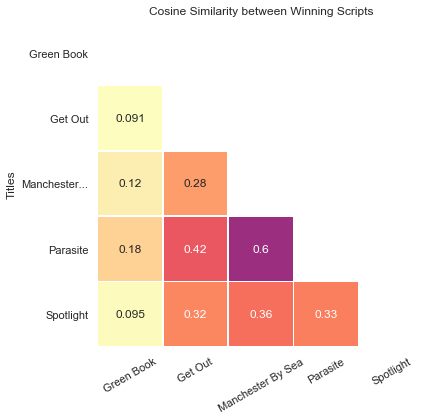

In [130]:
# Make similarity heatmap

# For winners
cmap = sns.color_palette('hls')
cmap = cmap.reverse()

sns.set(style = "white")

win_titles = ['Green Book', 'Get Out', 'Manchester...', 'Parasite', 'Spotlight']
win_sim_df['Titles'] = win_titles

#win_sim_df.set_index(['Titles'])

win_sim_df = win_sim_df.set_index(['Titles'])
Index = win_titles
win_sim_df = win_sim_df.rename(columns = {0: 'Green Book', 1: 'Get Out', 2: 'Manchester...', 3: 'Parasite', 4: 'Spotlight'})
win_sim_df


mask = np.triu(np.ones_like(win_sim, dtype=np.bool))
xticks = win_sim_df.columns
plt.figure(figsize = (9, 6))
ax = sns.heatmap(win_sim_df, cmap = "magma_r", annot = True,
            square = True, cbar = False,
            linewidth = 0.5, mask = mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation = 30)
ax.set_yticklabels(
ax.get_yticklabels(), rotation = 0)
ax.set(title = "Cosine Similarity between Winning Scripts")

ax.get_figure().savefig('./winnerheatmap.png')


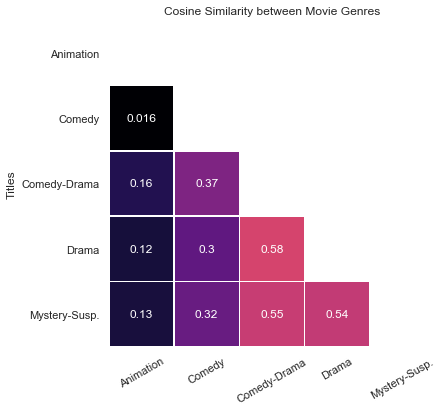

In [127]:
# By Genre


gen_sim_df = pd.DataFrame(cosine_similarity(tfidf_genre_fit))
gen_titles = ['Animation', 'Comedy', 'Comedy-Drama', 'Drama', 'Mystery-Susp.']
gen_sim_df["Titles"] = gen_titles
gen_sim_df = gen_sim_df.set_index(['Titles'])
gen_sim_df = gen_sim_df.rename(columns = {0: 'Animation', 1: 'Comedy', 
                                          2: 'Comedy-Drama', 3: 'Drama', 4: 'Mystery-Susp.'})

mask = np.triu(np.ones_like(gen_sim_df, dtype=np.bool))

xticks = gen_sim_df.columns

plt.figure(figsize = (9, 6))
ax = sns.heatmap(gen_sim_df, cmap = "magma", annot = True,
            square = True, cbar = False,
            linewidth = 0.5, mask = mask)
bottom, top = ax.get_ylim()
ax.set_yticklabels(
ax.get_yticklabels(), rotation = 0)
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation = 30)
ax.set(title = "Cosine Similarity between Movie Genres")

ax.get_figure().savefig('./genre_heatmap.png')

In [99]:
gen_sim_df

,Animation,Comedy,Comedy-Drama,Drama,Mystery Suspense,Titles
0,1.000000,0.015593,0.156630,0.123060,0.125826,Animation
1,0.015593,1.000000,0.374127,0.300797,0.321481,Comedy
2,0.156630,0.374127,1.000000,0.584141,0.549367,Comedy-Drama
3,0.123060,0.300797,0.584141,1.000000,0.537144,Drama
4,0.125826,0.321481,0.549367,0.537144,1.000000,Mystery Suspense


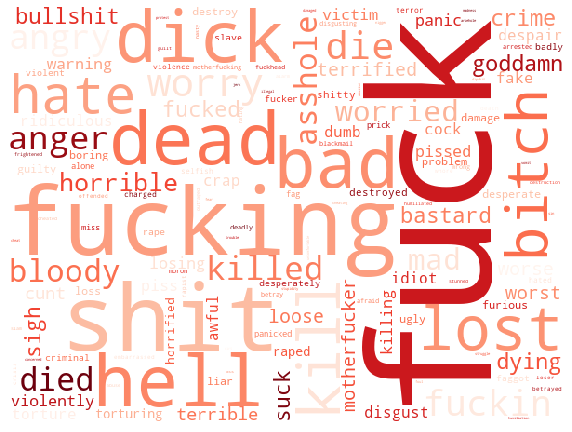

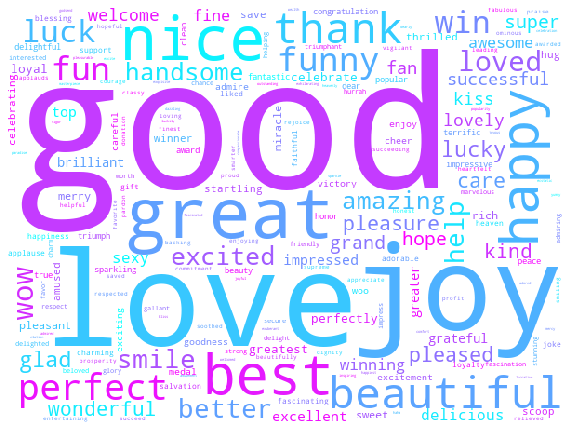

In [39]:
# Work for wordclouds

# Create tokenized words for all dialogue

movies_df['tokens'] = movies_df['cleaned_dialogue'].apply(w_tokenize)
movies_df

# make function to assign sentiment to tokenized words

def sentiment_score(words):
    sentiment_scores = [af.score(article) for article in words]
    return sentiment_scores

movies_df['senti'] = movies_df['tokens'].apply(sentiment_score)


# make df

tokens = movies_df['tokens']
senti = movies_df['senti']

tok = list(tokens)
sen = list(senti)


# Pairing and combining nested list to tuple list 
res = [(u, v) for x, y in zip(tok, sen) 
                               for u, v in zip(x, y)] 
res


# create dataframe from list of tuples
sent_df = pd.DataFrame(res, columns = ['word', 'senti'])

# get top 3500 positive and negative words for viz.
top3500_positive = sent_df.nlargest(3500, 'senti')

top3500_negative = sent_df.nsmallest(3500, 'senti')

top3500_negative = top3500_negative['word']

top3500_positive = top3500_positive['word']


# create string for word cloud
pos_str = ' '.join(top3500_positive)

negative_str = ' '.join(top3500_negative)

wc_negative = WordCloud(background_color = 'White', max_words = 200, 
               width = 600, height = 450, 
               collocations = False,
            colormap = 'Reds').generate(negative_str)

plt.figure(figsize = (10, 10))
plt.imshow(wc_negative)
#plt.title("Top Negative Sentiment Words")
plt.axis("off")

wc_positive = WordCloud(background_color = 'White', max_words = 200, 
               width = 600, height = 450, 
               collocations = False,
            colormap = 'cool').generate(pos_str)

plt.figure(figsize = (10, 10))
plt.imshow(wc_positive)
#plt.title("Top Positive Sentiment Words")
plt.axis("off")



wc_negative.to_file('./negative_sent.png')

wc_positive.to_file('./positive_sent.png')

In [133]:
winners['dialogue_length'].sum()

30746

In [ ]:

# ## Old - Not used


# # instantiate TFIDF for dialogue for losing scripts

# tfidf_losers = TfidfVectorizer(ngram_range = (1,2), max_df = .75, min_df = 3, stop_words = 'english')

# # fit + transform training data - dialogue for winning scripts
# tfidf_losers_fit = tfidf_losers.fit_transform(losers['cleaned_dialogue'])
# tfidf_vocab_losers = tfidf_losers.vocabulary_
# tfidf_vocab_losers = {k: v for k, v in sorted(tfidf_vocab_losers.items(), key=lambda item: item[1], reverse=True)}
# print(tfidf_vocab_losers)
# len(tfidf_vocab_losers)



# tf_losers_feat = tfidf_losers.get_feature_names()



# # topic modeling for losing scripts

# n_losers = nmf(n_components = 19).fit(tfidf_losers_fit) # set up nmf model for 19


# # function to marry up word value to feature names and output words per topic
# def print_top_words(model, feature_names, n_top_words): 
#     for topic_idx, topic in enumerate(model.components_):
#         message = "Topic %d: " % topic_idx
#         message += " ".join([feature_names[i]
#                              for i in topic.argsort()[:-n_top_words - 1:-1]])
#         print(message)
#     print()

# print_top_words(n_losers, tf_losers_feat, 10) # 10 words per topic



# topic_values = n_losers.transform(tfidf_losers_fit)
# losers['Dia_Topic'] = topic_values.argmax(axis = 1)


# function to marry up word value to feature names and output words per topic
# def print_top_words(model, feature_names, n_top_words): 
#     for topic_idx, topic in enumerate(model.components_):
#         message = "Topic %d: " % topic_idx
#         message += " ".join([feature_names[i]
#                              for i in topic.argsort()[:-n_top_words - 1:-1]])
#         print(message)
#     print()

# print_top_words(n_winners, tf_winners_feat, 10) # 10 words per topic

